In [1]:
import networkx as nx

from pathlib import Path


from panricci.utils import GFALoader
from panricci.ricci_flow import RicciFlow
# from panricci.ricci_flow.normalized_ricci_flow import NormalizedRicciFlow as RicciFlow

from panricci.node_distributions.variation_graph import DistributionNodes
# from panricci.node_distributions.sequence_graph import DistributionNodes

In [2]:
dirsave_graphs = "../output"

In [3]:
# DATA:
path_gfa = "../data/test1.gfa"
# path_chkpt = "../output/test3/ricci-flow/test3-ricciflow-5.edgelist"

# path_gfa = "/data/analysis-paper/experiments/mini-experiment-standard-not_alpha_consistent-not_fixblock/gfa-unchop/nodes/penalization0-min_len0-min_coverage0-alpha1/DQA1-3117.gfa"
# path_chkpt = "../output/graph-alignment/ricci-flow/DQA1-3117-alpha1-ricciflow-5.edgelist"

# path_gfa = "/data/analysis-paper/experiments/mini-experiment-standard-not_alpha_consistent-not_fixblock/gfa-unchop/nodes/penalization0-min_len0-min_coverage0-alpha10/DQA1-3117.gfa"
# path_chkpt = "../output/graph-alignment/ricci-flow/DQA1-3117-alpha10-ricciflow-5.edgelist"

___
## Apply Ricci-Flow to a Variation Graph

In [5]:
# load graph
gfa_loader = GFALoader(undirected=False)
G = gfa_loader(path_gfa)

# compute distribution of nodes
distribution = DistributionNodes(G, alpha=0.5)

# Initialize ricci-flow
ricci_flow = RicciFlow(G, distribution, dirsave_graphs=dirsave_graphs, save_last=False, save_intermediate_graphs=True)
G_ricci = ricci_flow.run(iterations=50, name=Path(path_gfa).stem)

[Ricci-Flow] 2025-04-02@20:35:39.307 | iteration 1
[Ricci-Flow] 2025-04-02@20:35:39.308 | Ricci-Flow iteration 1
[Ricci-Flow] 2025-04-02@20:35:39.311 | curvature of edge K(1,3)0.0625 is > tol=1e-11
[Ricci-Flow] 2025-04-02@20:35:39.311 | iteration 2
[Ricci-Flow] 2025-04-02@20:35:39.312 | Ricci-Flow iteration 2
[Ricci-Flow] 2025-04-02@20:35:39.314 | curvature of edge K(1,3)-0.01333333333333342 is > tol=1e-11
[Ricci-Flow] 2025-04-02@20:35:39.315 | iteration 3
[Ricci-Flow] 2025-04-02@20:35:39.315 | Ricci-Flow iteration 3
[Ricci-Flow] 2025-04-02@20:35:39.318 | curvature of edge K(1,3)0.0027700831024932704 is > tol=1e-11
[Ricci-Flow] 2025-04-02@20:35:39.318 | iteration 4
[Ricci-Flow] 2025-04-02@20:35:39.319 | Ricci-Flow iteration 4
[Ricci-Flow] 2025-04-02@20:35:39.321 | curvature of edge K(1,3)-0.0005787037037039422 is > tol=1e-11
[Ricci-Flow] 2025-04-02@20:35:39.322 | iteration 5
[Ricci-Flow] 2025-04-02@20:35:39.323 | Ricci-Flow iteration 5
[Ricci-Flow] 2025-04-02@20:35:39.326 | curvature o

Stopping Ricci-Flow in iteration 37, all curvatures below tol=1e-11

In [6]:
sum_w = 0
for u,v,data in G_ricci.edges(data=True,):
    sum_w += data["weight"]
sum_w

1.48463383108492

____
## plot embeddings


[Ricci-Flow] 2025-04-02@20:37:40.067 | matplotlib data path: /home/avila/miniforge3/envs/panricci/lib/python3.13/site-packages/matplotlib/mpl-data
[Ricci-Flow] 2025-04-02@20:37:40.071 | CONFIGDIR=/home/avila/.config/matplotlib
[Ricci-Flow] 2025-04-02@20:37:40.087 | interactive is False
[Ricci-Flow] 2025-04-02@20:37:40.088 | platform is linux
[Ricci-Flow] 2025-04-02@20:37:40.149 | CACHEDIR=/home/avila/.cache/matplotlib
[Ricci-Flow] 2025-04-02@20:37:40.153 | Using fontManager instance from /home/avila/.cache/matplotlib/fontlist-v390.json
[Ricci-Flow] 2025-04-02@20:37:40.552 | end - compute_node_embeddings
[Ricci-Flow] 2025-04-02@20:37:40.566 | Loaded backend module://matplotlib_inline.backend_inline version unknown.
[Ricci-Flow] 2025-04-02@20:37:40.567 | Loaded backend module://matplotlib_inline.backend_inline version unknown.
[Ricci-Flow] 2025-04-02@20:37:40.570 | findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
[Ricci-Flow] 2025-04-02@2

<Axes: xlabel='from_source', ylabel='to_sink'>

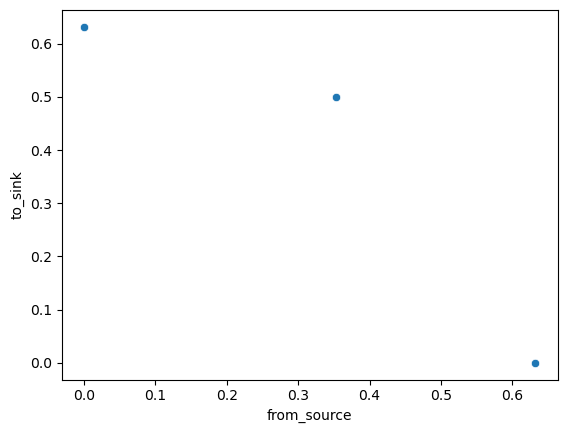

In [8]:
import seaborn as sns
import pandas as pd
from panricci.alignment.node_embeddings import NodeEmbeddings

compute_node_embeddings = NodeEmbeddings(
                                        ricci_embedding=True, # two coordinates considering shortest path [d(source, node),d(node,sink)]  
                                        seq_embedding=False   # 2 x 4^k coordinates, k-mer distributions for sequence spelled by the shortest paths between (source,node) and (node,sink) 
                                        )
node_emb = compute_node_embeddings(G_ricci)
coords = pd.DataFrame.from_dict(node_emb,orient="index",columns=["from_source","to_sink"])
sns.scatterplot(coords, x="from_source",y="to_sink",)